<a href="https://colab.research.google.com/github/elarchi2005/IA_2025/blob/main/sentimetn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análisis de Sentimientos con KNN (Versión Simple)
Este notebook realiza un análisis de sentimientos usando un modelo **KNN con k=5**, aplicando pasos básicos de limpieza y vectorización TF-IDF.


In [7]:

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('/content/reviews_sentiment.csv', sep=';')
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [11]:
def limpiar_texto(texto):
    texto = texto.lower()  # minúsculas
    texto = re.sub(r'[^a-zA-Záéíóúñü\s]', '', texto)  # quitar símbolos
    return texto

df['clean_review'] = df['Review Text'].astype(str).apply(limpiar_texto)
df = df.dropna(subset=['textSentiment'])
print("Datos limpios:")
display(df.head())

Datos limpios:


,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue,clean_review
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389,hola desde hace algo más de un mes me pone sin...
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187,han mejorado la apariencia pero no
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240,andres e puto amoooo
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271,me gustana mas la version anterior esta es mas...
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784,sin ser la biblia esta bien


In [13]:


X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['textSentiment'], test_size=0.2, random_state=42)


In [14]:


vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [15]:


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

y_pred = knn.predict(X_test_tfidf)


Precisión del modelo: 0.79


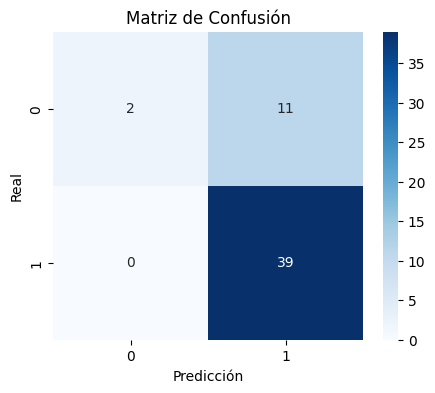

In [16]:

# Evaluar resultados
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



Conclusion
El modelo muestra un nivel de precisión adecuado para un análisis básico de sentimientos.
Esto significa que puede distinguir correctamente entre reseñas positivas y negativas, osea que KNN es util para este tipo de tareas
